# Indian Liver Patient Dataset (ILPD)

***Data Set Information***

ILPD data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records. Any patient whose age exceeded 89 is listed as being of age "90".

***Attribute information***

#Age : Age of the patient
#Gender : Sex of the patient (Female/Male)
#Total_Bilirubin : Total Billirubin in Milligrams Per Decilitre (mg/dL)
#Direct_Bilirubin : Conjugated Billirubin in Milligrams Per Decilitre (mg/dL)
#Alkaline_Phosphatase : Alkaline Phosphatase in international units per liter(IU/L)
#Alanine_Aminotransferase : Alanine Aminotransferase in international units per liter(IU/L)
#Aspartate_Aminotransferase : Aspartate Aminotransferase in international units per liter(IU/L)
#Total_Proteins : Total Proteins in Grams Per Decilitre (g/dL)
#Albumin : Albumin in Grams Per Decilitre (g/dL)
#Albumin_and_Globulin_Ratio : Albumin and Globulin Ratio
#Class : Selector field used to split the data into two sets (Has liver disease or not)

In [1]:
# Import all required libraries for reading, analysing and visualizing data
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold, learning_curve, validation_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,\
roc_auc_score, roc_curve, auc, cohen_kappa_score, precision_recall_curve, classification_report
from scipy import stats

from sklearn.base import clone
from itertools import combinations


!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

from keras import initializers
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Suppress warning 
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore", category=RuntimeWarning)
#warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Initialize seed value
np.random.seed(1)

Using TensorFlow backend.


***Importing the dataset***

In [2]:
# Importing the dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv'
df = pd.read_csv(url, header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1


In [3]:
# File does not contain headers, so loading the headers manually
df.columns =['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphatase',
'Alanine_Aminotransferase','Aspartate_Aminotransferase','Total_Proteins','Albumin',
'Albumin_and_Globulin_Ratio','Class']

In [4]:
# Check if data has been properly loaded
# Last 2 entries of the dataset
df.tail(2)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Class
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.0,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.5,2


# Exploratory Data Analysis

***Overview of data***

In [5]:
# Gender non-numeric variable. All others are numeric.
# There are 10 features and 1 output (Class variable)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphatase          583 non-null int64
Alanine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Proteins                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Class                         583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
# Provides statistical information about numerical columns in the dataset
# For Albumin_and_Globulin_Ratio, only 579 entries have valid values indicating 4 missing values
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Class
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
# Mean, standard deviation & Variance for the 'Class' variable

y = np.array(df.loc[:, 'Class'].values)
np.mean(y), np.std(y), np.var(y)

(1.2864493996569468, 0.45210191449840326, 0.20439614109312151)

# Data Preprocessing

***Handling Missing Data***

In [8]:
# Check for any null or missing values
# The only data that is null is the Albumin_and_Globulin_Ratio - 4 rows are null

missing_data = df.columns[df.isnull().any()]
df[missing_data].isnull().sum()

Albumin_and_Globulin_Ratio    4
dtype: int64

In [9]:
# Displaying the missing value rows
df[df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Class
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [10]:
# Remove rows with missing values
# Out of 583 total rows, dropped 4 rows with missing values (0.68 %) and only 579 entries have valid values

OriginalData = df.copy()
df = OriginalData.dropna()
df.Albumin_and_Globulin_Ratio.count()

579

***Handling Duplicate Data***

In [11]:
# Check for duplicate data entries
df_duplicate = df[df.duplicated(keep = False)]
df_duplicate

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Class
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [12]:
# Consider only the first row of each duplicate data and other unique rows, so that the dataset becomes unique
df = df[~df.duplicated(keep = 'first')]
df.shape

(566, 11)

***Handling Categorical Data***

In [13]:
# Create a new dummy feature for each unique value
df1 = pd.get_dummies(df['Gender'])
df = pd.concat([df,df1],axis=1)
df.pop('Gender')
df.head(2)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Class,Female,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1


In [14]:
# Mapping 0 to Male & 1 to Female gender

#gender_mapping = {'Female': 1,'Male': 0}
#df['Gender'] = df['Gender'].map(gender_mapping)
#df['Gender'].unique()

***Dealing with Class variable***

In [15]:
# Moving the 'Class' outcome variable to the last in dataframe
df2 = df['Class']
df.pop('Class')
df = pd.concat([df,df2],axis=1)
df.head(2)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Female,Male,Class
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1,1


In [16]:
# Output value has '1' for liver disease and '2' for no liver disease, so changing it '0' for no disease
# Value 1 indicates that the patient has liver disease and 0 indicates the patient does not have liver disease.
df['Class'] = df['Class'].apply(lambda x:0 if x==2 else x)
df['Class'].unique()

array([1, 0], dtype=int64)

***Handling Outlier Data***

Age                               AxesSubplot(0.125,0.71587;0.168478x0.16413)
Total_Bilirubin                AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Direct_Bilirubin               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Alkaline_Phosphatase           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Alanine_Aminotransferase         AxesSubplot(0.125,0.518913;0.168478x0.16413)
Aspartate_Aminotransferase    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Total_Proteins                AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Albumin                       AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Albumin_and_Globulin_Ratio       AxesSubplot(0.125,0.321957;0.168478x0.16413)
Female                        AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Male                          AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Class                         AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

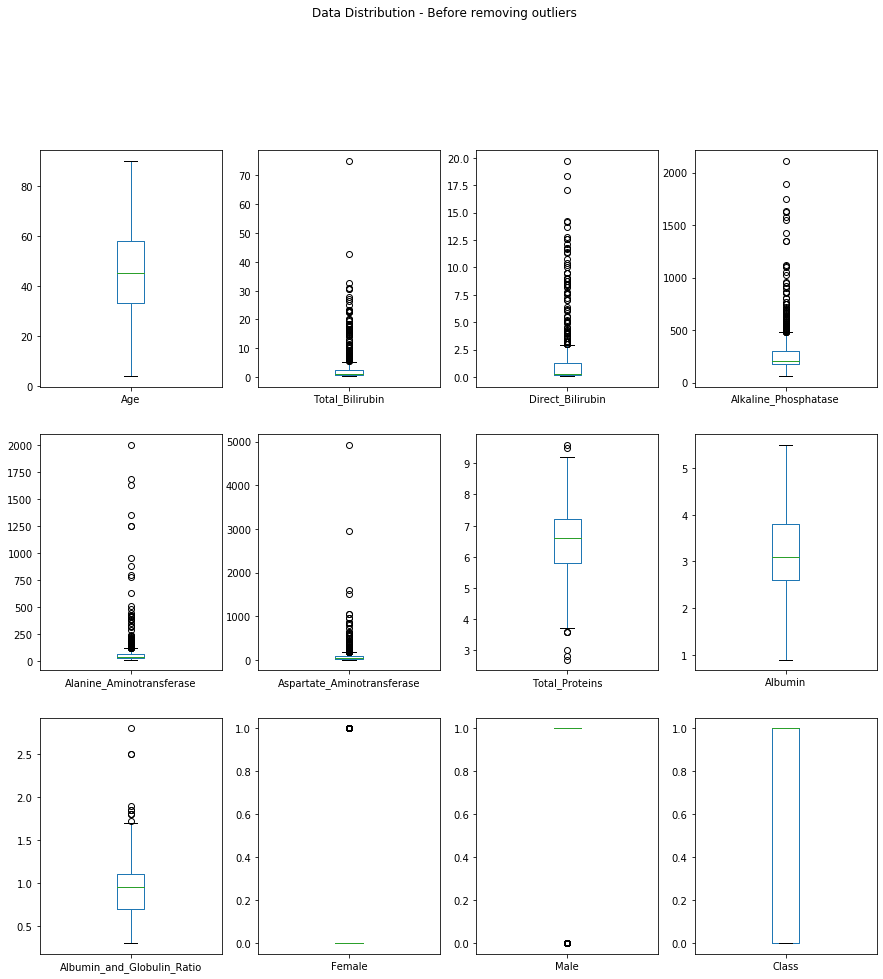

In [17]:
DataWithOutlier = df.copy()
DataWithOutlier.plot(kind= 'box' , subplots=True, layout=(4,4),figsize=(15,20), title='Data Distribution - Before removing outliers')

In [18]:
# Outlier data- 1st array represents the rows and 2nd array represents its corresponding columns
z = np.abs(stats.zscore(df))
print(np.where(z >= 4.5))

(array([ 25,  44,  72, 108, 109, 110, 110, 111, 111, 112, 121, 128, 128,
       155, 187, 194, 194, 219, 412, 430, 487, 488, 514, 531, 542, 542,
       555, 558], dtype=int64), array([4, 4, 3, 3, 3, 4, 5, 4, 5, 4, 3, 4, 5, 1, 3, 4, 5, 3, 3, 3, 2, 1,
       2, 8, 1, 2, 8, 8], dtype=int64))


In [19]:
# Remove outlier data with the standard deviation of 4.5 (top few cases)
df = df[(np.abs(stats.zscore(df)) < 4.5).all(axis=1)]
df.shape

(543, 12)

In [20]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Female,Male,Class
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,45.040516,2.748803,1.265009,270.686924,60.872928,82.959484,6.503315,3.158379,0.943131,0.246777,0.753223,0.703499
std,16.314772,4.480239,2.319831,177.322536,87.364045,129.371138,1.090003,0.799630,0.295994,0.431533,0.431533,0.457136
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.000000,22.000000,25.000000,5.800000,2.600000,0.700000,0.000000,1.000000,0.000000
50%,46.000000,1.000000,0.300000,206.000000,33.000000,40.000000,6.600000,3.100000,0.960000,0.000000,1.000000,1.000000
75%,58.000000,2.300000,1.150000,292.000000,58.000000,79.000000,7.200000,3.800000,1.100000,0.000000,1.000000,1.000000
max,90.000000,30.500000,14.200000,1350.000000,875.000000,950.000000,9.600000,5.500000,1.900000,1.000000,1.000000,1.000000


Age                               AxesSubplot(0.125,0.71587;0.168478x0.16413)
Total_Bilirubin                AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Direct_Bilirubin               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Alkaline_Phosphatase           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Alanine_Aminotransferase         AxesSubplot(0.125,0.518913;0.168478x0.16413)
Aspartate_Aminotransferase    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Total_Proteins                AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Albumin                       AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Albumin_and_Globulin_Ratio       AxesSubplot(0.125,0.321957;0.168478x0.16413)
Female                        AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Male                          AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Class                         AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

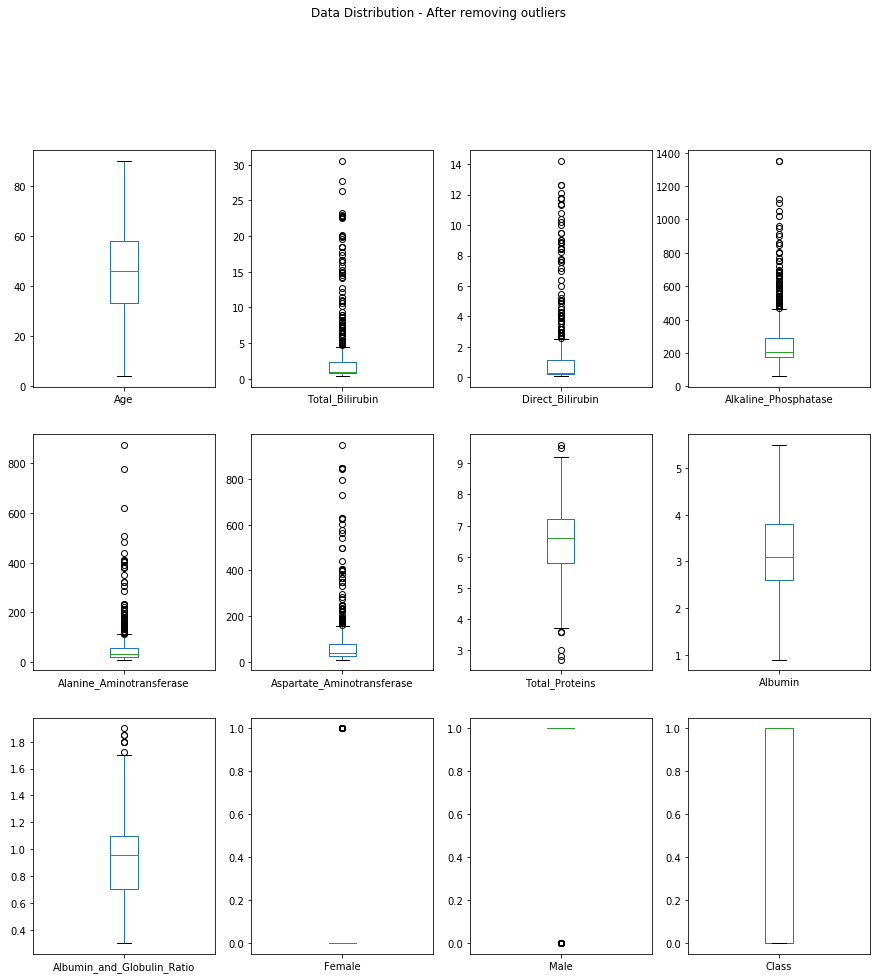

In [21]:
df.plot(kind= 'box' , subplots=True, layout=(4,4),  figsize=(15,20), title='Data Distribution - After removing outliers')

# Transform certain features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027390D5AAC8>,
      dtype=object)

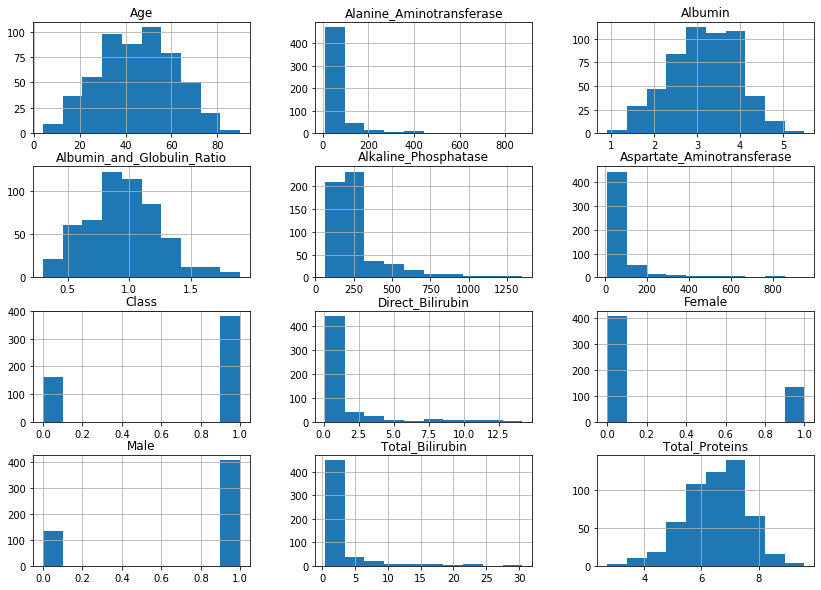

In [22]:
df.hist(figsize=(14,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027391831488>,
      dtype=object)

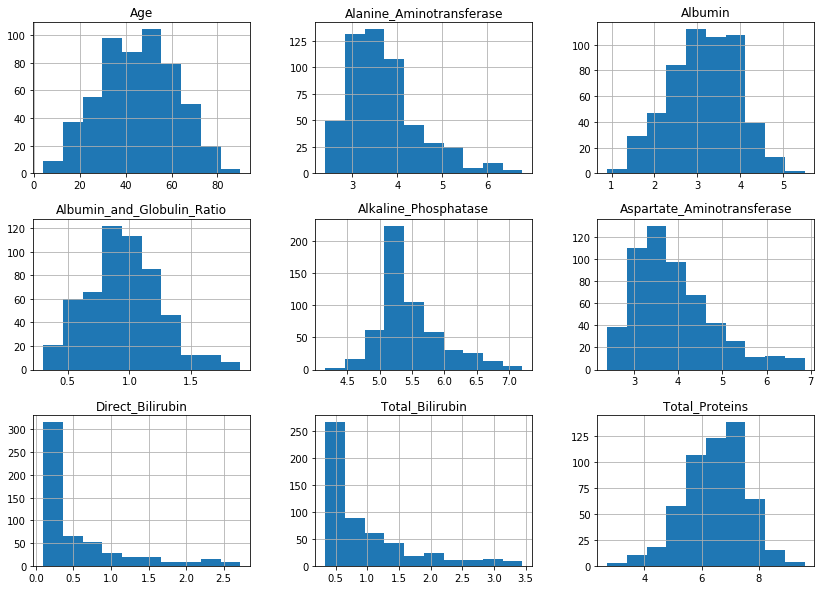

In [23]:
# Skewed features
features_hist = df.drop(['Class', 'Female', 'Male'], axis = 1)
skewed = ['Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphatase', 'Alanine_Aminotransferase','Aspartate_Aminotransferase']

# Log-transform the skewed features
features_hist[skewed] = df[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
features_hist.hist(figsize=(14,10))

# Data analysis

In [24]:
# Mean, standard deviation & Variance for the 'Class' variable

y = np.array(df.loc[:, 'Class'].values)
np.mean(y), np.std(y), np.var(y)

(0.7034990791896869, 0.4567144893354595, 0.20858812476894953)

In [25]:
# Retrive the number of patients in the dataset based on gender

#m, f = df['Gender'].value_counts()
#print('Number of male patients : ',m,'(',round(m/(m+f) *100,2),'% )')
#print('Number of female patients : ',f,'(',round(f/(m+f) *100,2),'% )')

In [26]:
# Retrive the number of patients in the dataset based on gender

m,f = df['Female'].value_counts()
print('Number of male patients : ',m,'(',round(m/(m+f) *100,2),'% )')
print('Number of female patients : ',f,'(',round(f/(m+f) *100,2),'% )')

Number of male patients :  409 ( 75.32 % )
Number of female patients :  134 ( 24.68 % )


In [27]:
# Retrieve the number of patients with and without liver disease

yes, no = df['Class'].value_counts()
print('Number of patients diagnosed with liver disease: ',yes,'(',round(yes/(yes+no) *100,2),'% )')
print('Number of patients not diagnosed with liver disease: ',no,'(',round(no/(yes+no) *100,2),'% )')

Number of patients diagnosed with liver disease:  382 ( 70.35 % )
Number of patients not diagnosed with liver disease:  161 ( 29.65 % )


In [28]:
# Retrive the number of patients diagnosed with liver disease based on gender

mld = df[(df['Male'] == 1) & (df['Class'] == 1)]['Class'].count()
fld = df[(df['Female'] == 1) & (df['Class'] == 1)]['Class'].count()

mnld = df[(df['Male'] == 1) & (df['Class'] == 0)]['Class'].count()
fnld = df[(df['Female'] == 1) & (df['Class'] == 0)]['Class'].count()

print('Number of male patients diagnosed with liver disease: ',mld,'(',round(mld/yes *100,2),'% )')
print('Number of female patients diagnosed with liver disease: ',fld,'(',round(fld/yes *100,2),'% )')

print('\nNumber of male patients without liver disease: ',mnld,'(',round(mnld/no *100,2),'% )')
print('Number of female patients without liver disease: ',fnld,'(',round(fnld/no *100,2),'% )')

Number of male patients diagnosed with liver disease:  296 ( 77.49 % )
Number of female patients diagnosed with liver disease:  86 ( 22.51 % )

Number of male patients without liver disease:  113 ( 70.19 % )
Number of female patients without liver disease:  48 ( 29.81 % )


In [29]:
# Group the patients with and without liver disease and gender and display its corresponding age
df[['Class','Male', 'Female', 'Age']].groupby(['Class','Male', 'Female']).mean()

Age
Class Male Female           
0     0    1       43.000000
      1    0       40.716814
1     0    1       43.313953
      1    0       47.523649

# Exploring Relations

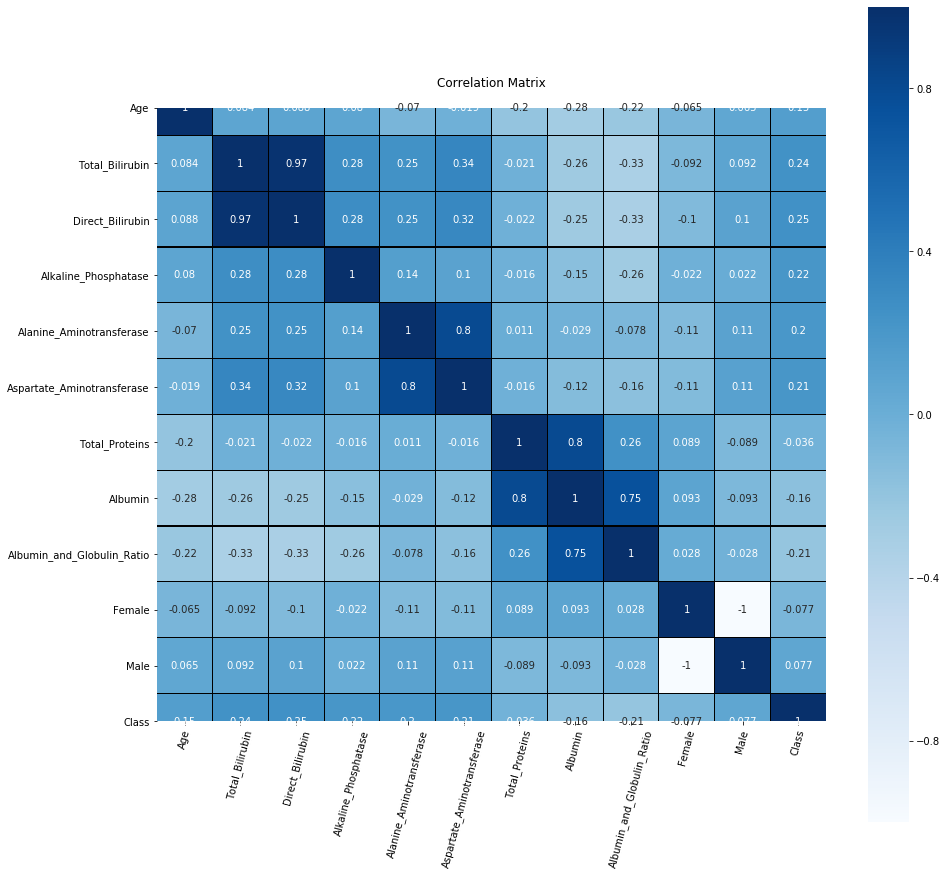

In [30]:
# Correlation between pairs of variables
corr = df.corr()
plt.rcParams['figure.figsize']=(15,15)
ax=sns.heatmap(corr, cbar=True, annot=True, cmap='Blues', square=True, linecolor='black', linewidths=0.20)
plt.setp(ax.axes.get_xticklabels(), rotation=75)
plt.title('Correlation Matrix\n')
plt.show()

***Exploring Feature Space***

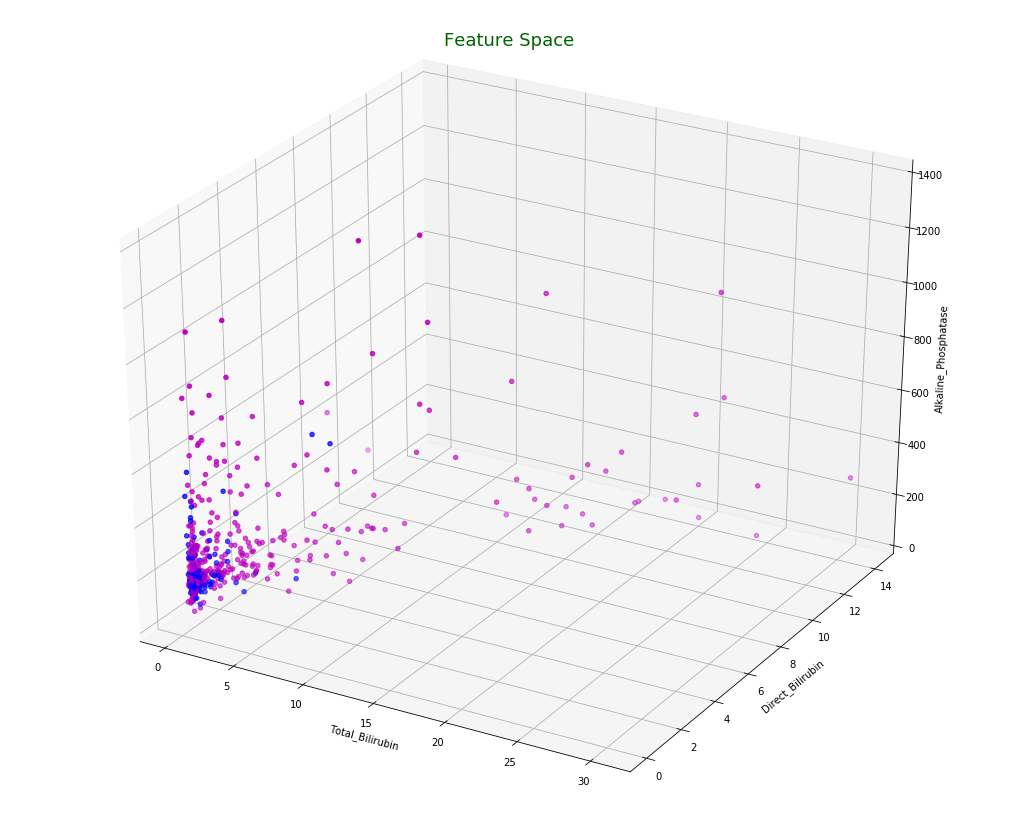

In [31]:
# Exploring feature space for some of the attributes

feature1 = df['Total_Bilirubin'].values
feature2 = df['Direct_Bilirubin'].values 
feature3 = df['Alkaline_Phosphatase'].values


df['Class'] = df['Class'].astype('str')
c = df['Class'].values
df['Class'] = df['Class'].astype('int')
c[c=='0'] = 'b' #Without liver disease
c[c=='1'] = 'm' #With liver disease

fig = plt.figure(figsize = (18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature1, feature2, feature3, color=c)
ax.set_title('Feature Space\n', fontsize=18, color='DarkGreen')
ax.set_xlabel('Total_Bilirubin')
ax.set_ylabel('Direct_Bilirubin')
ax.set_zlabel('Alkaline_Phosphatase')

plt.show()

# Feature Scaling

***Data sampling***

In [32]:
# Separate Class and other variables
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

# Upsample the minority class to prevent the imbalance from affecting the model
OS = RandomOverSampler()
X, y = OS.fit_sample(X, y)
print(X.shape) #bigger because of oversampling
print(y.shape)

(764, 11)
(764,)


***Data Partitioning***

In [33]:
# Partitioning dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(573, 11)
(573,)
(191, 11)
(191,)


***Data Normalization***

In [34]:
# Normalization via min-max scaling - Transform features by scaling each feature to a given range
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 573 samples.
Testing set has 191 samples.


***Required methods***

In [35]:
# Sequential Backward Selection- from practical lectures at UCL
# Sequentially remove features from full feature subset until the new feature subspace contains desired number of features

class SBS(): 
    def __init__(self, estimator, k_features, scoring=f1_score,
                 test_size=0.25, random_state=12):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=self.test_size, 
                                 random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [36]:
# Metrics for evaluating the model

def display_metrics(clf, X, y, predict):
    confmat = confusion_matrix(y_true=y, y_pred=predict)
    tn, fp, fn, tp = confmat.ravel()
    print('\nConfusion matrix :')
    fig, ax = plt.subplots(figsize=(3,3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    labels = ['0', '1']
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.tight_layout()
    plt.show()

    #Sensitivity = tp / (tp + fn)
    Specificity = tn / (tn + fp)
    #ppv = tp / (tp + fp)
    npv = tn / (tn + fn)
    
    print("True Negatives: ",tn)
    print("False Positives: ",fp)
    print("False Negatives: ",fn)
    print("True Positives: ",tp)
    

    rf_cr = classification_report(y, predict)
    print("\n\nClassification Report : \n",rf_cr)
    
    fpr, tpr, threshold = roc_curve(y, predict)
    roc_auc = auc(fpr, tpr)
    
    p, r, threshold = precision_recall_curve(y, predict)
    f1_auc = auc(r,p)

    print('Accuracy: %.3f' % accuracy_score(y_true=y, y_pred=predict))
    print('Area Under ROC Curve: %.3f' % roc_auc_score(y, predict))
    #print('Area Under ROC Curve: %.3f' % roc_auc)    
    print('Positive predictive value (or) Precision: %.3f' % precision_score(y_true=y, y_pred=predict))
    print("Negative Predictive Value: ",round(npv,3))
    print('Sensitivity (or) True Positive Rate (or) Recall: %.3f' % recall_score(y_true=y, y_pred=predict))
    print("Specificity (or) False Positive Rate: ",round(Specificity,3))
    print('F1: %.3f' % f1_score(y_true=y, y_pred=predict))
    print('Area Under Precision-Recall Curve: %.3f' % f1_auc)
    # The kappa statistic, which is a number between -1 and 1. The maximum value means complete agreement; zero or lower means chance agreement
    #print('Cohen Kappa: %.3f' % cohen_kappa_score(y, predict))
    
    
    plt.subplots(1,2, figsize=(15,15))
    plt.subplot(2,2,1)
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(fpr, tpr, 'b', label = 'AUC-ROC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    #plt.show()
    
    plt.subplot(2,2,2)
    plt.title('Precision Recall Curve')
    plt.plot(r, p, 'b', label = 'AUC-PR = %0.2f' % f1_auc)
    plt.legend(loc = 'lower left')
    plt.plot([1, 0], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()

# Random Forest

***Feature Ranking and Selection***

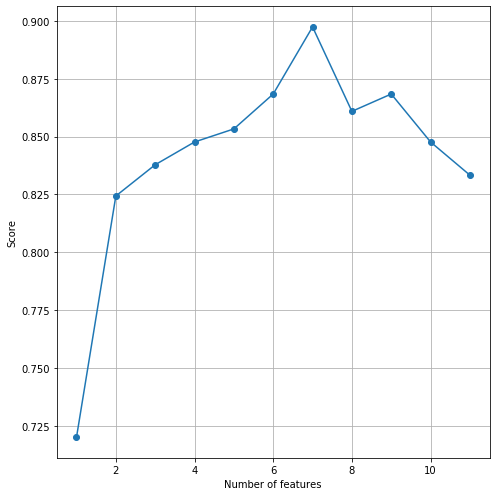

In [37]:
# Feature ranking and selection using Sequential Backward Selection (SBS)
rf = RandomForestClassifier(criterion='entropy',n_estimators=250, random_state=12)

# selecting features
sbs_rf = SBS(rf, k_features=1)
sbs_rf.fit(X_train, y_train)

# plotting performance of feature subsets
rf_feat = [len(k) for k in sbs_rf.subsets_]

plt.rcParams['figure.figsize']=(7,7)
plt.plot(rf_feat, sbs_rf.scores_, marker='o')
plt.ylabel('Score')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [38]:
# Feature ranking using Sequential Backward Selection (SBS)
sbs_rf.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10),
 (0, 1, 2, 3, 4, 6, 7, 8, 9, 10),
 (0, 1, 2, 3, 4, 7, 8, 9, 10),
 (0, 1, 2, 3, 4, 7, 9, 10),
 (0, 1, 3, 4, 7, 9, 10),
 (0, 3, 4, 7, 9, 10),
 (0, 3, 4, 7, 9),
 (0, 3, 4, 9),
 (0, 3, 9),
 (0, 3),
 (3,)]

In [39]:
# Feature selection
rf_3=list(sbs_rf.subsets_[4])
print(rf_3)

features = df.columns[rf_3].values
feature_labels = np.append(features, 'Class')

print ('\n Selected feature columns : ', features)
rf_df = df[feature_labels]
rf_df.head(2)

[0, 1, 3, 4, 7, 9, 10]

 Selected feature columns :  ['Age' 'Total_Bilirubin' 'Alkaline_Phosphatase' 'Alanine_Aminotransferase'
 'Albumin' 'Female' 'Male']


,Age,Total_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Albumin,Female,Male,Class
0,65,0.7,187,16,3.3,1,0,1
1,62,10.9,699,64,3.2,0,1,1


In [40]:
rf_df.shape

(543, 8)

***Data sampling***

In [41]:
# Separate the Class and other variables for the selected features
rf_X = np.array(rf_df.iloc[:, :-1].values)
rf_y = np.array(rf_df.iloc[:, -1].values)

# Data sampling on the selected features
OS = RandomOverSampler()
rf_X, rf_y = OS.fit_sample(rf_X, rf_y)
print(rf_X.shape) #bigger because of oversampling
print(rf_y.shape)

(764, 7)
(764,)


***Data Partitioning***

In [42]:
# Split the dataset into train and test dataset on the selected features
rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(rf_X, rf_y, test_size=0.25, random_state=12)
print(rf_X_train.shape ,'\n',rf_X_test.shape, '\n',rf_y_train.shape, '\n',rf_y_test.shape)

(573, 7) 
 (191, 7) 
 (573,) 
 (191,)


***Data Normalization***

In [43]:
# Normalization via min-max scaling - Transform features by scaling each feature to a given range
mms = MinMaxScaler()
rf_X_train = mms.fit_transform(rf_X_train)
rf_X_test = mms.transform(rf_X_test)

print ("Training set has {} samples.".format(rf_X_train.shape[0]))
print ("Testing set has {} samples.".format(rf_X_test.shape[0]))

Training set has 573 samples.
Testing set has 191 samples.


# Base Random Forest

In [44]:
# Base random forest classifier
rf_base = RandomForestClassifier(random_state=12)
rf_base

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [45]:
# Fitting data to the model
rf_base.fit(rf_X_train, rf_y_train)

rf_base_train_predict = rf_base.predict(rf_X_train)
rf_base_test_predict = rf_base.predict(rf_X_test)

***Training metrics for base random forest model***


Training metrics for base random forest classifier:

Confusion matrix :


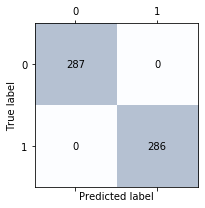

True Negatives:  287
False Positives:  0
False Negatives:  0
True Positives:  286


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       286

    accuracy                           1.00       573
   macro avg       1.00      1.00      1.00       573
weighted avg       1.00      1.00      1.00       573

Accuracy: 1.000
Area Under ROC Curve: 1.000
Positive predictive value (or) Precision: 1.000
Negative Predictive Value:  1.0
Sensitivity (or) True Positive Rate (or) Recall: 1.000
Specificity (or) False Positive Rate:  1.0
F1: 1.000
Area Under Precision-Recall Curve: 1.000


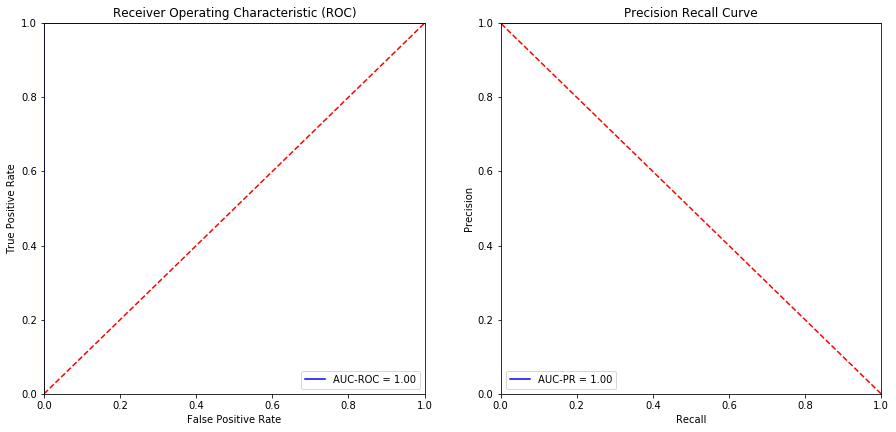

In [46]:
# Training metrics - Base model
print ('\033[1m' + '\nTraining metrics for base random forest classifier:' + '\033[0m')
display_metrics(rf_base, rf_X_train, rf_y_train, rf_base_train_predict)

***Testing metrics for base random forest model***


Testing metrics for base random forest classifier:

Confusion matrix :


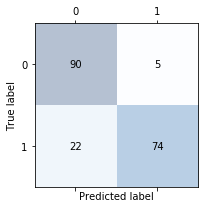

True Negatives:  90
False Positives:  5
False Negatives:  22
True Positives:  74


Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.95      0.87        95
           1       0.94      0.77      0.85        96

    accuracy                           0.86       191
   macro avg       0.87      0.86      0.86       191
weighted avg       0.87      0.86      0.86       191

Accuracy: 0.859
Area Under ROC Curve: 0.859
Positive predictive value (or) Precision: 0.937
Negative Predictive Value:  0.804
Sensitivity (or) True Positive Rate (or) Recall: 0.771
Specificity (or) False Positive Rate:  0.947
F1: 0.846
Area Under Precision-Recall Curve: 0.911


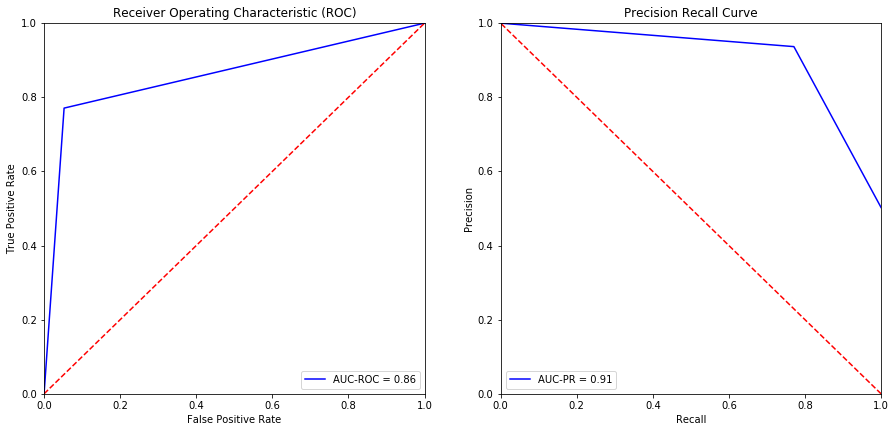

In [47]:
# Testing metrics - Base model
print ('\033[1m' + '\nTesting metrics for base random forest classifier:' + '\033[0m')
display_metrics(rf_base, rf_X_test, rf_y_test, rf_base_test_predict)

# Random forest - Hyperparameter tuning

***Hyperparameter tuning using Grid Search***

In [48]:
# Split the dataset using StratifiedKFold method
kfold = StratifiedKFold(n_splits=10)

random_forest_classifier = RandomForestClassifier()

# Parameters to include in the model. Using only few parameters inorder to reduce the processing time
parameter_grid = {'n_estimators': [50, 125, 200],
                  'criterion': ['gini', 'entropy'],
                  'max_depth': [20, 25, 30],                  
                  'class_weight': ['balanced','balanced_subsample'],
                  'max_features': ['sqrt'],
                  'random_state' : [12],
                  'verbose' : [0]
                  #'min_samples_split': [2, 3, 5],
                  #'min_samples_leaf': [1, 3, 5],
                  #'bootstrap' : [True, False],
                  #'oob_score': [True, False],
                  #'n_jobs' : [3],                  
                  #'warm_start': [True, False]
                  }

# Grid search
rf_grid_search = GridSearchCV(random_forest_classifier, scoring = 'f1', param_grid = parameter_grid, cv = kfold)

# Fit the model
rf_grid_search.fit(rf_X_train, rf_y_train)

print ("Best Score: {}".format(rf_grid_search.best_score_))
print ("Best params: {}".format(rf_grid_search.best_params_))

Best Score: 0.806550277073088
Best params: {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 125, 'random_state': 12, 'verbose': 0}


In [49]:
# Random forest classifier using the best parameters got from hyperparameter tuning

rf_tune_train_predict = rf_grid_search.predict(rf_X_train)
rf_tune_test_predict = rf_grid_search.predict(rf_X_test)

***Training metrics after hyperparameter tuning***


Training metrics for random forest classifier after hyperparameter tuning using Grid Search:

Confusion matrix :


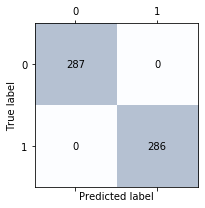

True Negatives:  287
False Positives:  0
False Negatives:  0
True Positives:  286


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       286

    accuracy                           1.00       573
   macro avg       1.00      1.00      1.00       573
weighted avg       1.00      1.00      1.00       573

Accuracy: 1.000
Area Under ROC Curve: 1.000
Positive predictive value (or) Precision: 1.000
Negative Predictive Value:  1.0
Sensitivity (or) True Positive Rate (or) Recall: 1.000
Specificity (or) False Positive Rate:  1.0
F1: 1.000
Area Under Precision-Recall Curve: 1.000


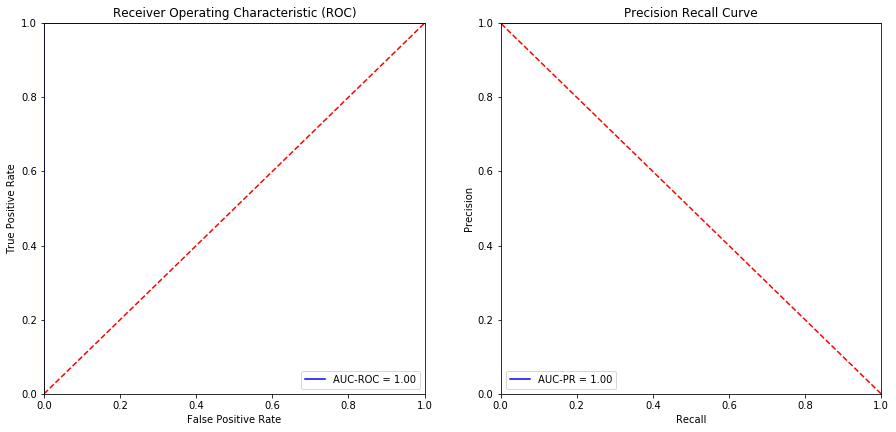

In [50]:
# Training metrics - After hyperparameter tuning
print ('\033[1m' + '\nTraining metrics for random forest classifier after hyperparameter tuning using Grid Search:' + '\033[0m')
display_metrics(rf_grid_search, rf_X_train, rf_y_train, rf_tune_train_predict)

***Learning curve***

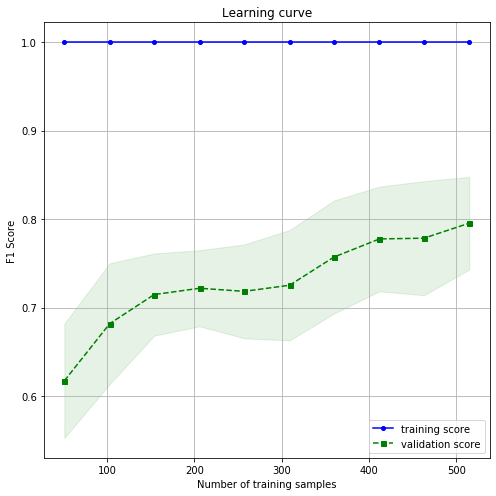

In [51]:
# Initializing learning curve parameters
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=rf_grid_search.best_estimator_, 
                X=rf_X_train, 
                y=rf_y_train, 
                train_sizes=np.linspace(0.1, 1.0, 10), 
                scoring="f1",
                cv=kfold,
                n_jobs=1
                )

# Calculate mean and standard deviation for training dataset scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test dataset scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean f1 scores for training and test datasets
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=4, label='training score')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation score')

# Plot f1 bands for training and test sets
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.1, color='green')

# Create plot
plt.grid()
plt.title('Learning curve')
plt.xlabel('Number of training samples')
plt.ylabel('F1 Score')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

***Validation curve***

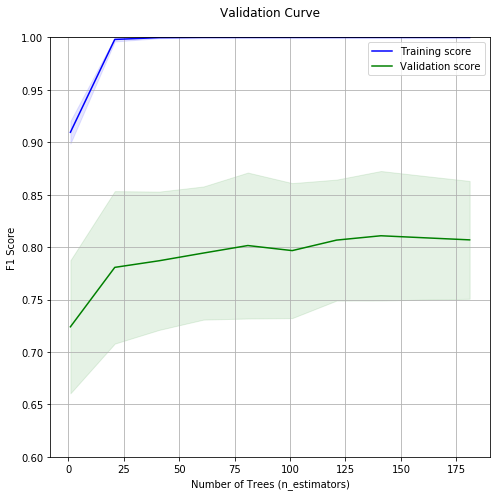

In [52]:
# Create range of values for parameter
param_range = np.arange(1, 200, 20)

# Calculate f1 score on training and test set using range of parameter values
train_scores, test_scores = validation_curve(rf_grid_search.best_estimator_, 
                                             rf_X_train, 
                                             rf_y_train, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             scoring="f1",
                                             cv=kfold
                                            )


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean f1 scores for training and test sets
plt.plot(param_range, train_mean, color='blue', label='Training score')
plt.plot(param_range, test_mean, color='green', label='Validation score')

# Plot f1 bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

# Create plot
plt.grid()
plt.legend(loc='best')
plt.title("Validation Curve\n")
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('F1 Score')
plt.ylim([0.6, 1.0])
plt.tight_layout()
plt.show()

***Testing metrics after hyperparameter tuning***


Testing metrics for random forest classifier after hyperparameter tuning using Grid Search:

Confusion matrix :


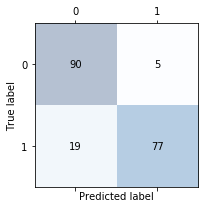

True Negatives:  90
False Positives:  5
False Negatives:  19
True Positives:  77


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.95      0.88        95
           1       0.94      0.80      0.87        96

    accuracy                           0.87       191
   macro avg       0.88      0.87      0.87       191
weighted avg       0.88      0.87      0.87       191

Accuracy: 0.874
Area Under ROC Curve: 0.875
Positive predictive value (or) Precision: 0.939
Negative Predictive Value:  0.826
Sensitivity (or) True Positive Rate (or) Recall: 0.802
Specificity (or) False Positive Rate:  0.947
F1: 0.865
Area Under Precision-Recall Curve: 0.920


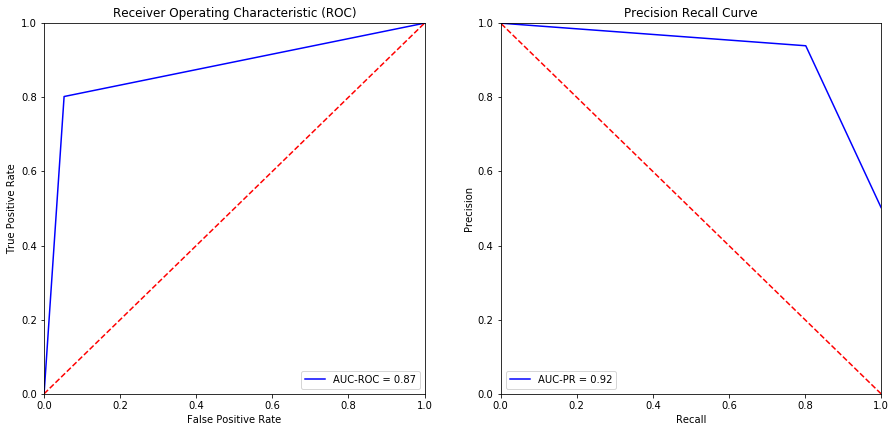

In [53]:
# Testing metrics - After hyperparameter tuning
print ('\033[1m' + '\nTesting metrics for random forest classifier after hyperparameter tuning using Grid Search:' + '\033[0m')
display_metrics(rf_grid_search, rf_X_test, rf_y_test, rf_tune_test_predict)

# Artificial Neural Network (ANN)

***Keras - Base model***

In [54]:
# Keras model
my_init = initializers.glorot_uniform(seed=1)

# Define a new keras base model
def create_binary_model(optimizer='Adam'):
    # create model  
    model = Sequential()
    model.add(Dense(8, input_dim=11, kernel_initializer=my_init, activation='relu'))
    model.add(Dense(4, kernel_initializer=my_init, activation='relu'))
    model.add(Dense(1, kernel_initializer=my_init, activation='sigmoid'))
    
    # Compile model
    #adam = Adam(lr=0.1)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Build model
binary_model = KerasClassifier(build_fn=create_binary_model, verbose=True, shuffle=False)

In [55]:
# Fit the binary model on the training data
binary_model.fit(X_train, y_train, batch_size=10, shuffle=False)

Epoch 1/1
573/573 [==============================] - 1s 1ms/step - loss: 0.6924 - accuracy: 0.5323


In [56]:
# predictions for binary model
nn_base_test_pred = np.round(binary_model.predict(X_test)).astype(int)

191/191 [==============================] - 0s 111us/step



Testing metrics for base model of Keras classifier:

Confusion matrix :


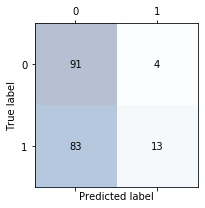

True Negatives:  91
False Positives:  4
False Negatives:  83
True Positives:  13


Classification Report : 
               precision    recall  f1-score   support

           0       0.52      0.96      0.68        95
           1       0.76      0.14      0.23        96

    accuracy                           0.54       191
   macro avg       0.64      0.55      0.45       191
weighted avg       0.64      0.54      0.45       191

Accuracy: 0.545
Area Under ROC Curve: 0.547
Positive predictive value (or) Precision: 0.765
Negative Predictive Value:  0.523
Sensitivity (or) True Positive Rate (or) Recall: 0.135
Specificity (or) False Positive Rate:  0.958
F1: 0.230
Area Under Precision-Recall Curve: 0.667


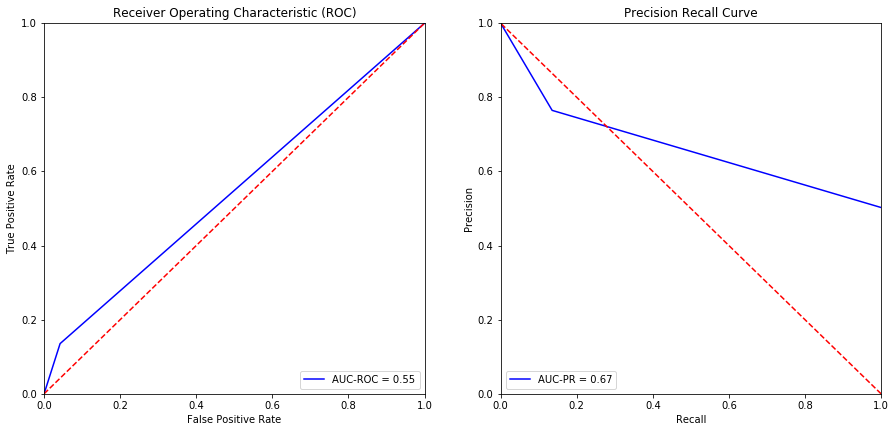

In [57]:
# Metrics for Base model using Keras
print ('\033[1m' + '\nTesting metrics for base model of Keras classifier:' + '\033[0m')
display_metrics(binary_model, X_test, y_test, nn_base_test_pred)

# Hyperparameter tuning in ANN

***Increasing number of iterations***

In [58]:
# Fit the base model with increasing the number of iterations and including batch size
binary_model.fit(X_train, y_train, epochs=100, batch_size=500, verbose = 1, shuffle=False)

Epoch 1/100
573/573 [==============================] - 1s 1ms/step - loss: 0.7103 - accuracy: 0.4136
Epoch 2/100
573/573 [==============================] - 0s 19us/step - loss: 0.7090 - accuracy: 0.4276
Epoch 3/100
573/573 [==============================] - 0s 12us/step - loss: 0.7077 - accuracy: 0.4258
Epoch 4/100
573/573 [==============================] - 0s 9us/step - loss: 0.7065 - accuracy: 0.4171
Epoch 5/100
573/573 [==============================] - 0s 7us/step - loss: 0.7053 - accuracy: 0.4136
Epoch 6/100
573/573 [==============================] - 0s 8us/step - loss: 0.7042 - accuracy: 0.4223
Epoch 7/100
573/573 [==============================] - 0s 7us/step - loss: 0.7032 - accuracy: 0.4223
Epoch 8/100
573/573 [==============================] - 0s 7us/step - loss: 0.7022 - accuracy: 0.4607
Epoch 9/100
573/573 [==============================] - 0s 7us/step - loss: 0.7012 - accuracy: 0.4642
Epoch 10/100
573/573 [==============================] - 0s 7us/step - loss: 0.7003 - accu

In [59]:
# predictions for binary model
nn_Iteration_test_pred = np.round(binary_model.predict(X_test)).astype(int)

191/191 [==============================] - 0s 112us/step



Testing metrics for model with more number of iterations using Keras classifier:

Confusion matrix :


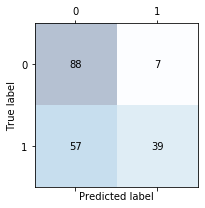

True Negatives:  88
False Positives:  7
False Negatives:  57
True Positives:  39


Classification Report : 
               precision    recall  f1-score   support

           0       0.61      0.93      0.73        95
           1       0.85      0.41      0.55        96

    accuracy                           0.66       191
   macro avg       0.73      0.67      0.64       191
weighted avg       0.73      0.66      0.64       191

Accuracy: 0.665
Area Under ROC Curve: 0.666
Positive predictive value (or) Precision: 0.848
Negative Predictive Value:  0.607
Sensitivity (or) True Positive Rate (or) Recall: 0.406
Specificity (or) False Positive Rate:  0.926
F1: 0.549
Area Under Precision-Recall Curve: 0.776


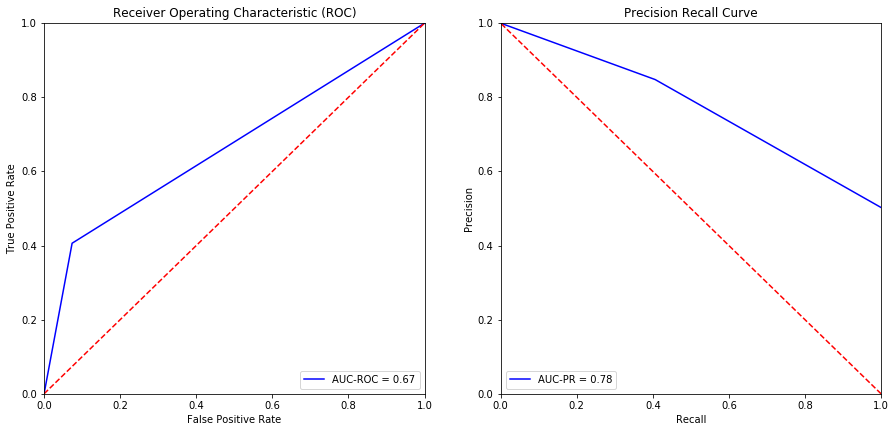

In [60]:
# Metrics for model with more iterations using Keras
print ('\033[1m' + '\nTesting metrics for model with more number of iterations using Keras classifier:' + '\033[0m')
display_metrics(binary_model, X_test, y_test, nn_Iteration_test_pred)

***Add more layers***

In [81]:
# Define a new keras model with additional layers

def create_binary_model_layers(optimizer='Adam'):
    # create model    
    model = Sequential()
    model.add(Dense(32, input_dim=11, kernel_initializer=my_init, activation='relu'))
    model.add(Dense(16, kernel_initializer=my_init, activation='relu'))
    model.add(Dense(8, kernel_initializer=my_init, activation='relu'))
    model.add(Dense(4, kernel_initializer=my_init, activation='relu'))
    model.add(Dense(1, kernel_initializer=my_init, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Build model
binary_model_layers = KerasClassifier(build_fn=create_binary_model_layers, verbose=True, shuffle=False)

In [82]:
# Fit the model with additional layers
binary_model_layers.fit(X_train, y_train, epochs=100, batch_size=500, verbose = 1, shuffle=False)

Epoch 1/100
573/573 [==============================] - 1s 2ms/step - loss: 0.7037 - accuracy: 0.4991
Epoch 2/100
573/573 [==============================] - 0s 19us/step - loss: 0.6998 - accuracy: 0.4991
Epoch 3/100
573/573 [==============================] - 0s 15us/step - loss: 0.6969 - accuracy: 0.4991
Epoch 4/100
573/573 [==============================] - 0s 10us/step - loss: 0.6946 - accuracy: 0.4991
Epoch 5/100
573/573 [==============================] - 0s 11us/step - loss: 0.6929 - accuracy: 0.4991
Epoch 6/100
573/573 [==============================] - 0s 10us/step - loss: 0.6915 - accuracy: 0.4991
Epoch 7/100
573/573 [==============================] - 0s 7us/step - loss: 0.6903 - accuracy: 0.4991
Epoch 8/100
573/573 [==============================] - 0s 16us/step - loss: 0.6893 - accuracy: 0.5009
Epoch 9/100
573/573 [==============================] - 0s 11us/step - loss: 0.6883 - accuracy: 0.5253
Epoch 10/100
573/573 [==============================] - 0s 12us/step - loss: 0.6872 

In [83]:
# predictions for binary model
nn_layer_test_pred = np.round(binary_model_layers.predict(X_test)).astype(int)

191/191 [==============================] - 0s 198us/step



Testing metrics for model with additional layers using Keras classifier:

Confusion matrix :


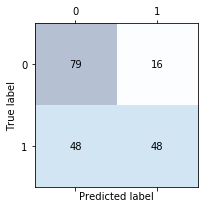

True Negatives:  79
False Positives:  16
False Negatives:  48
True Positives:  48


Classification Report : 
               precision    recall  f1-score   support

           0       0.62      0.83      0.71        95
           1       0.75      0.50      0.60        96

    accuracy                           0.66       191
   macro avg       0.69      0.67      0.66       191
weighted avg       0.69      0.66      0.66       191

Accuracy: 0.665
Area Under ROC Curve: 0.666
Positive predictive value (or) Precision: 0.750
Negative Predictive Value:  0.622
Sensitivity (or) True Positive Rate (or) Recall: 0.500
Specificity (or) False Positive Rate:  0.832
F1: 0.600
Area Under Precision-Recall Curve: 0.751


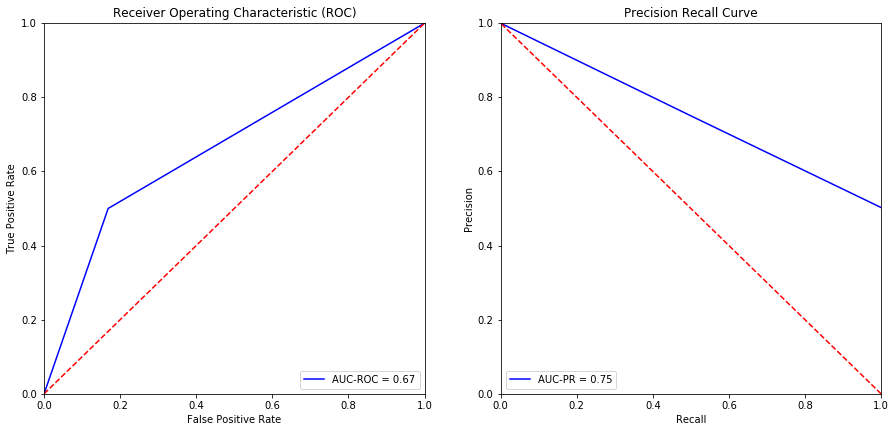

In [84]:
# Metrics for model with additional layers using Keras
print ('\033[1m' + '\nTesting metrics for model with additional layers using Keras classifier:' + '\033[0m')
display_metrics(binary_model_layers, X_test, y_test, nn_layer_test_pred)

***Optimized model***

In [74]:
# Define a new keras model to implement optimized model

def create_optimized_model(dense_layer_sizes, learn_rate=0.01, optimizer='Adam'):
    # create model
    my_init = initializers.glorot_uniform(seed=1)
    model = Sequential()
    model.add(Dense(dense_layer_sizes, input_dim=11, kernel_initializer=my_init, activation='relu'))
    model.add(Dense(4, kernel_initializer=my_init, activation='relu'))
    model.add(Dense(1, kernel_initializer=my_init, activation='sigmoid'))
    
       
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# Build model
Optimized_model = KerasClassifier(build_fn=create_optimized_model, verbose=True, shuffle=False)

# Define the grid search parameters
# Only few values are given in order to reduce the execution time
dense_layer_sizes = [8, 12]
batch_size = [5, 15]
epochs = [15, 20, 30]
learn_rate = [0.0001, 0.01]
#optimizer = ['SGD', 'RMSprop', 'Adadelta', 'Adam']
#my_init = ['uniform', 'normal']

param_grid = dict(dense_layer_sizes= dense_layer_sizes, batch_size=batch_size, epochs=epochs, learn_rate=learn_rate)

Kfold = KFold(n_splits=10, random_state=12, shuffle=True)
# n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer.
opt_grid = GridSearchCV(estimator=Optimized_model, param_grid=param_grid, n_jobs=-1, cv=Kfold)
opt_grid_result = opt_grid.fit(X_train, y_train)

C:\Users\vidhy\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/30
573/573 [==============================] - 1s 1ms/step - loss: 0.6919 - accuracy: 0.5236
Epoch 2/30
573/573 [==============================] - 0s 297us/step - loss: 0.6774 - accuracy: 0.5899
Epoch 3/30
573/573 [==============================] - 0s 310us/step - loss: 0.6652 - accuracy: 0.6283
Epoch 4/30
573/573 [==============================] - 0s 504us/step - loss: 0.6498 - accuracy: 0.6510
Epoch 5/30
573/573 [==============================] - 0s 504us/step - loss: 0.6332 - accuracy: 0.6684
Epoch 6/30
573/573 [==============================] - 0s 493us/step - loss: 0.6197 - accuracy: 0.6719
Epoch 7/30
573/573 [==============================] - 0s 348us/step - loss: 0.6086 - accuracy: 0.6789
Epoch 8/30
573/573 [==============================] - 0s 322us/step - loss: 0.5998 - accuracy: 0.6911
Epoch 9/30
573/573 [==============================] - 0s 316us/step - loss: 0.5926 - accuracy: 0.6859
Epoch 10/30
573/573 [==============================] - 0s 409us/step - loss: 0.5868 

In [75]:
# Summarize results
print("Best: %f using %s" % (opt_grid_result.best_score_, opt_grid_result.best_params_))
means = opt_grid_result.cv_results_['mean_test_score']
stds = opt_grid_result.cv_results_['std_test_score']
params = opt_grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.705021 using {'batch_size': 5, 'dense_layer_sizes': 12, 'epochs': 30, 'learn_rate': 0.01}
0.690956 (0.054999) with: {'batch_size': 5, 'dense_layer_sizes': 8, 'epochs': 15, 'learn_rate': 0.0001}
0.696249 (0.059080) with: {'batch_size': 5, 'dense_layer_sizes': 8, 'epochs': 15, 'learn_rate': 0.01}
0.690986 (0.070471) with: {'batch_size': 5, 'dense_layer_sizes': 8, 'epochs': 20, 'learn_rate': 0.0001}
0.701452 (0.068038) with: {'batch_size': 5, 'dense_layer_sizes': 8, 'epochs': 20, 'learn_rate': 0.01}
0.698004 (0.071278) with: {'batch_size': 5, 'dense_layer_sizes': 8, 'epochs': 30, 'learn_rate': 0.0001}
0.697973 (0.058591) with: {'batch_size': 5, 'dense_layer_sizes': 8, 'epochs': 30, 'learn_rate': 0.01}
0.694525 (0.068997) with: {'batch_size': 5, 'dense_layer_sizes': 12, 'epochs': 15, 'learn_rate': 0.0001}
0.692710 (0.058820) with: {'batch_size': 5, 'dense_layer_sizes': 12, 'epochs': 15, 'learn_rate': 0.01}
0.691077 (0.071921) with: {'batch_size': 5, 'dense_layer_sizes': 12, 'epochs

In [76]:
# Fit the optimized model
Optimized_model = opt_grid_result.best_estimator_
history=Optimized_model.fit(X_train, y_train, validation_split=0.25, verbose = False, shuffle=False)

In [77]:
# predictions for optimized model
nn_optimized_test_pred = np.round(Optimized_model.predict(X_test)).astype(int)

191/191 [==============================] - 0s 303us/step



Testing metrics for optimized model using Keras classifier:

Confusion matrix :


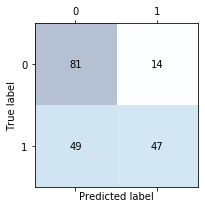

True Negatives:  81
False Positives:  14
False Negatives:  49
True Positives:  47


Classification Report : 
               precision    recall  f1-score   support

           0       0.62      0.85      0.72        95
           1       0.77      0.49      0.60        96

    accuracy                           0.67       191
   macro avg       0.70      0.67      0.66       191
weighted avg       0.70      0.67      0.66       191

Accuracy: 0.670
Area Under ROC Curve: 0.671
Positive predictive value (or) Precision: 0.770
Negative Predictive Value:  0.623
Sensitivity (or) True Positive Rate (or) Recall: 0.490
Specificity (or) False Positive Rate:  0.853
F1: 0.599
Area Under Precision-Recall Curve: 0.758


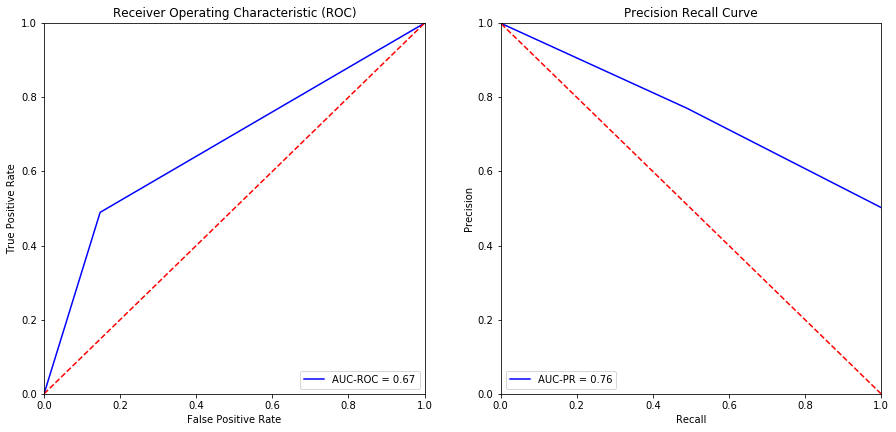

In [78]:
# Metrics for optimized model using Keras
print ('\033[1m' + '\nTesting metrics for optimized model using Keras classifier:' + '\033[0m')
display_metrics(Optimized_model, X_test, y_test, nn_optimized_test_pred)

In [79]:
print(history.history.keys())

acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


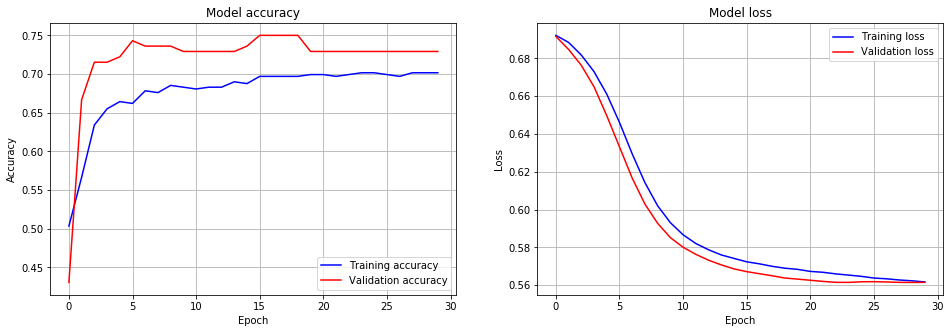

In [80]:
# Summarize history for accuracy
fig, subplt = plt.subplots(1,2, figsize=(16,5))
subplt[0].plot(acc, 'b',label='Accuracy')
subplt[0].plot(val_acc, 'r',label='Epoch')
subplt[0].set_title('Model accuracy')
subplt[0].set_ylabel('Accuracy')
subplt[0].set_xlabel('Epoch')
subplt[0].legend(['Training accuracy', 'Validation accuracy'], loc='lower right')
subplt[0].grid()

# Summarize history for loss
subplt[1].plot(loss, 'b',label='Loss')
subplt[1].plot(val_loss, 'r',label='Epoch')
subplt[1].set_title('Model loss')
subplt[1].set_ylabel('Loss')
subplt[1].set_xlabel('Epoch')
subplt[1].legend(['Training loss', 'Validation loss'], loc='upper right')
subplt[1].grid()

for key in results.history.keys():
    plt.plot(results.history[key],label=key)
plt.title("loss={:5.4f}".format(results.history["loss"][-1]))
plt.legend()
#plt.yscale('log')
plt.show()